In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("/Users/leonardo/Documents/GitHub/data-blueprint/Data/soci_econ_country_profiles.csv")

In [3]:
print("Dataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nBasic Statistics:")
print(df.describe())

print("\nFirst few rows:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 96 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Unnamed: 0                                                   66 non-null     int64  
 1   country                                                      66 non-null     object 
 2   Region                                                       66 non-null     object 
 3   Surface area (km2)                                           66 non-null     int64  
 4   Population in thousands (2017)                               66 non-null     int64  
 5   Population density (per km2, 2017)                           66 non-null     float64
 6   Sex ratio (m per 100 f, 2017)                                66 non-null     float64
 7   GDP: Gross domestic product (million current US$)            66 non-

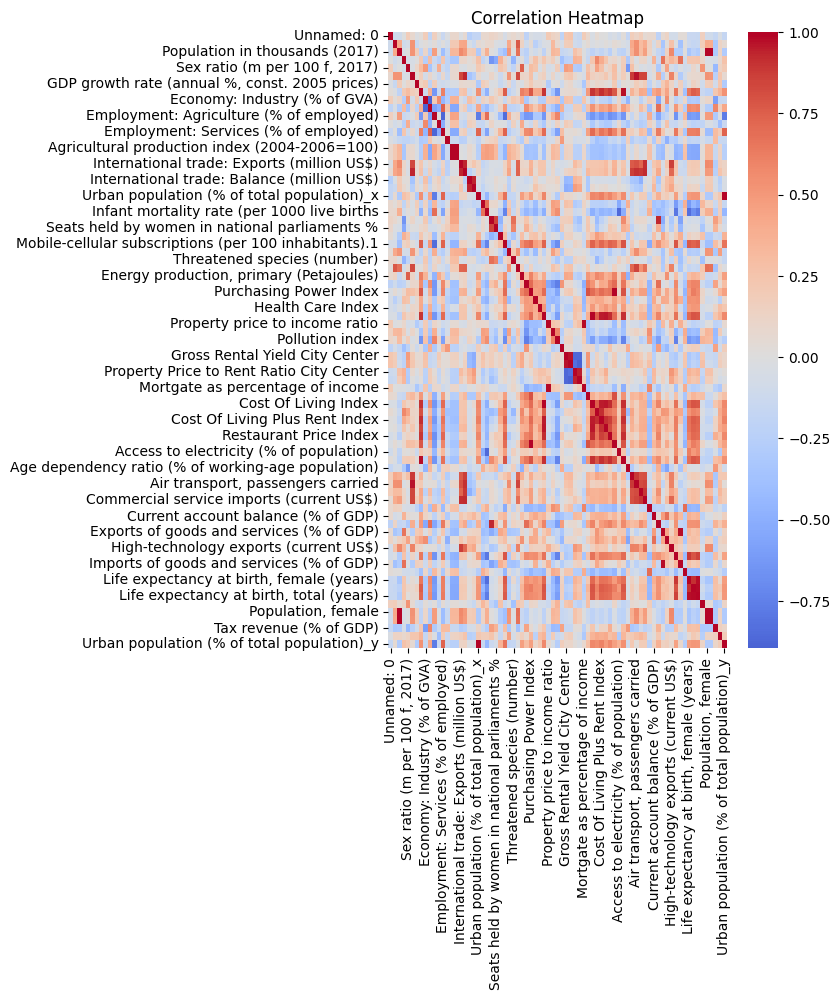

In [7]:
numeric_df = df.select_dtypes(include=[np.number])
numeric_df = numeric_df.loc[:, numeric_df.std(numeric_only=True) > 0]
correlation_matrix = numeric_df.corr()
correlation_matrix = correlation_matrix.replace([np.inf, -np.inf], np.nan).fillna(0)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, annot=False)
plt.title('Correlation Heatmap')
plt.show()

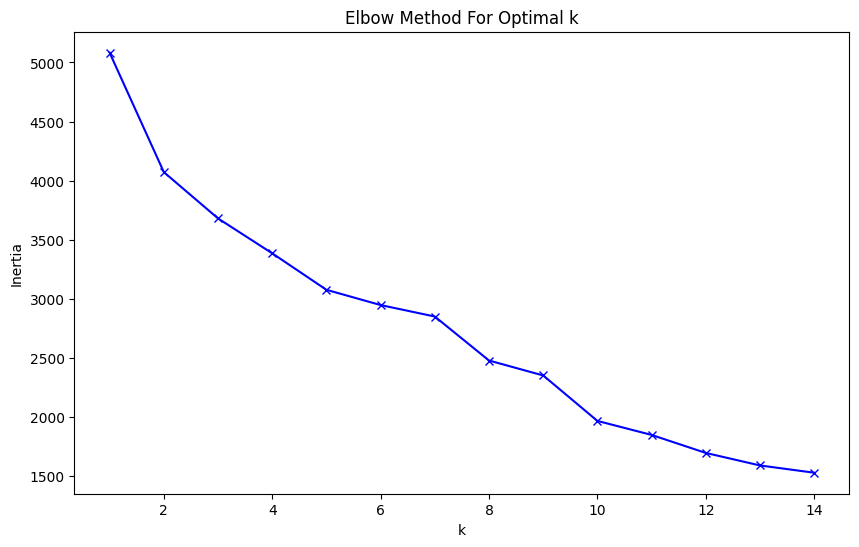


Cluster Sizes:
Cluster
3    28
2    23
1    10
4     3
0     2
Name: count, dtype: int64

Cluster Characteristics:
         Unnamed: 0  Surface area (km2)  Population in thousands (2017)  \
Cluster                                                                   
0         17.500000        6.443632e+06                    1.374348e+06   
1         44.700000        7.382133e+05                    9.692520e+04   
2         30.782609        1.378827e+06                    4.286978e+04   
3         28.714286        1.323180e+06                    3.440925e+04   
4         50.333333        7.673070e+05                    1.499233e+04   

         Population density (per km2, 2017)  Sex ratio (m per 100 f, 2017)  \
Cluster                                                                      
0                                300.250000                     106.950000   
1                                180.670000                      99.840000   
2                                820.682609   

In [8]:


numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
X = df[numerical_columns]

X = X.fillna(X.mean())

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertias = []
K = range(1, 15)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

print("\nCluster Sizes:")
print(df['Cluster'].value_counts())

print("\nCluster Characteristics:")
cluster_means = df.groupby('Cluster')[numerical_columns].mean()
print(cluster_means)


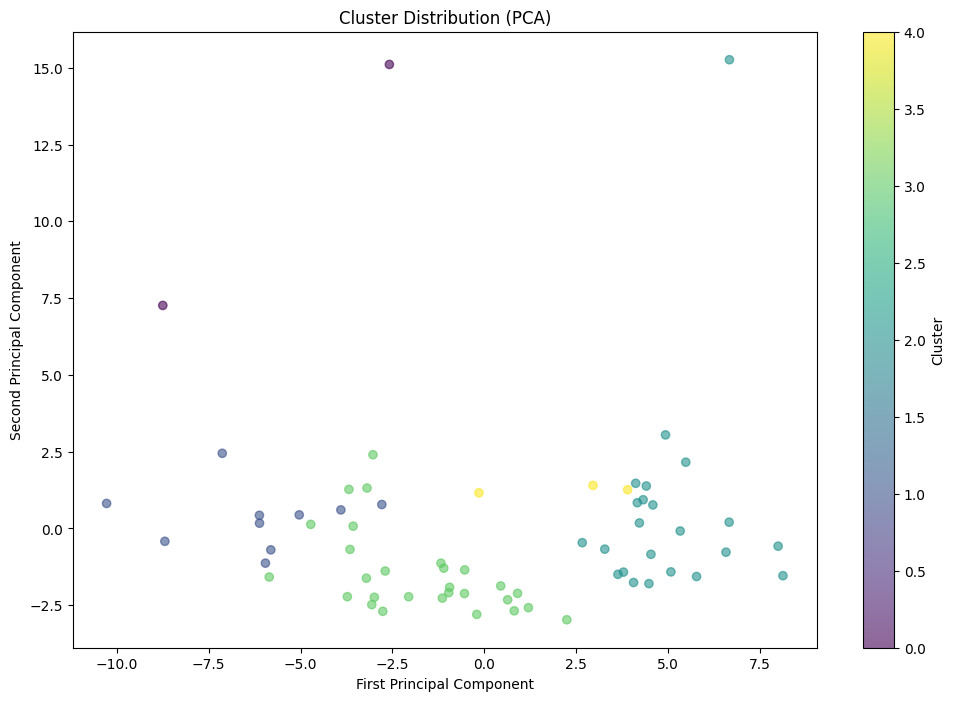


Explained variance ratio: [0.26416773 0.13382419]
Total variance explained: 0.39799192366681907


<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [10]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1],
                     c=df['Cluster'],
                     cmap='viridis', 
                     alpha=0.6)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Cluster Distribution (PCA)')
plt.colorbar(scatter, label='Cluster')
plt.show()

print("\nExplained variance ratio:", pca.explained_variance_ratio_)
print("Total variance explained:", sum(pca.explained_variance_ratio_))



optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(12, 8))